In [13]:
import pandas as pd
news=pd.read_csv('OnlineNewsPopularity.csv')

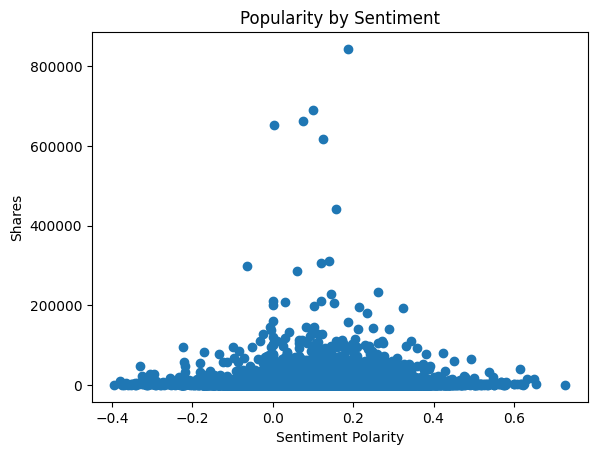

In [14]:
from matplotlib import pyplot as plt
plt.scatter(news[' global_sentiment_polarity'],news[' shares'])
plt.title('Popularity by Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Shares')
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
x = news[' global_sentiment_polarity'].values.reshape(-1,1)
y = news[' shares'].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(x, y)
print(regressor.coef_)
print(regressor.intercept_)

[[499.34840588]]
[3335.80329021]


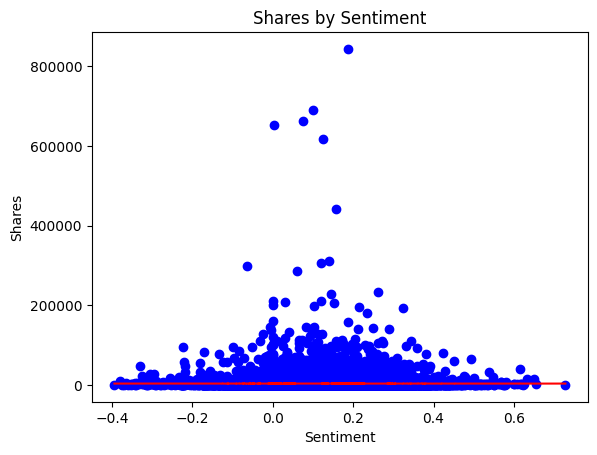

In [16]:
regline=regressor.predict(x)
plt.scatter(news[' global_sentiment_polarity'],news[' shares'],color='blue')
plt.plot(sorted(news[' global_sentiment_polarity'].tolist()),regline,'r')
plt.title('Shares by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Shares')
plt.show()

In [17]:
k=15
newsentiment=0.5

In [19]:
allsentiment=news[' global_sentiment_polarity'].tolist()
allshares=news[' shares'].tolist()

In [20]:
distances=[abs(x-newsentiment) for x in allsentiment]

In [22]:
import numpy as np
idx = np.argsort(distances)

In [24]:
nearbyshares=[allshares[i] for i in idx[0:k]]

In [25]:
print(np.mean(nearbyshares))

7344.466666666666


In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
x=np.array(allsentiment).reshape(-1,1)
y=np.array(allshares)

In [30]:
knnregressor = KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(x,y)
print(knnregressor.predict(np.array([newsentiment]).reshape(1,-1)))

[7344.46666667]


In [31]:
#linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
print(regressor.predict(np.array([newsentiment]).reshape(1,-1)))

[3585.47749315]


In [32]:
#knn
from sklearn.neighbors import KNeighborsRegressor
knnregressor = KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
print(knnregressor.predict(np.array([newsentiment]).reshape(1,-1)))

[7344.46666667]


In [33]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
dtregressor = DecisionTreeRegressor(max_depth=3)
dtregressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
print(dtregressor.predict(np.array([newsentiment]).reshape(1,-1)))

[3978.70776621]


In [34]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor()
rfregressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
print(rfregressor.predict(np.array([newsentiment]).reshape(1,-1)))

[5190.17355672]


In [36]:
#neural network
from sklearn.neural_network import MLPRegressor
nnregressor = MLPRegressor()
nnregressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
print(nnregressor.predict(np.array([newsentiment]).reshape(1,-1)))

[3983.02860526]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


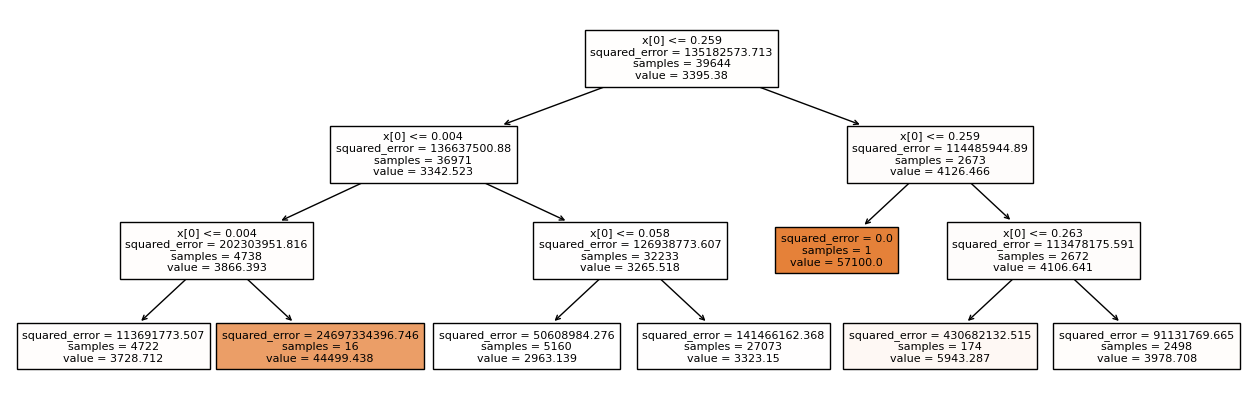

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
plot_tree(dtregressor, filled=True, fontsize=8)
plt.savefig('decisiontree.png')

In [39]:
allprediction=regressor.predict(np.array([allsentiment]).reshape(-1,1))
predictionerror=abs(allprediction-allsentiment)
print(np.mean(predictionerror))

3395.26087436506


In [40]:
from sklearn.model_selection import train_test_split
x=np.array([allsentiment]).reshape(-1,1)
y=np.array(allshares)
trainingx,testx,trainingy,testy=train_test_split(x,y,random_state=1)

In [45]:
print(len(trainingx))
print(len(trainingy))
print(len(testx))
print(len(testy))

29733
29733
9911
9911


In [46]:
rfregressor = RandomForestRegressor(random_state=1)
rfregressor.fit(trainingx, trainingy)
predicted = rfregressor.predict(testx)
predictionerror = abs(predicted-testy)

In [50]:
print(np.mean(predictionerror))

3816.4741523079983


In [51]:
knnregressor = KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(trainingx, trainingy)
predicted = knnregressor.predict(testx)
predictionerror = abs(predicted-testy)

In [52]:
print(np.mean(predictionerror))

3292.401883429186


In [53]:
x=news[[' global_sentiment_polarity',' n_unique_tokens',' n_non_stop_words']]
y=np.array(allshares)
trainingx,testx,trainingy,testy=train_test_split(x,y,random_state=1)
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(random_state=1)
rfregressor.fit(trainingx, trainingy)
predicted = rfregressor.predict(testx)
predictionerror = abs(predicted-testy)

In [54]:
print(np.mean(predictionerror))

3474.431322312199


In [55]:
themedian=np.median(news[' shares'])
news['abovemedianshares']=1*(news[' shares']>themedian)

In [56]:
x=news[[' global_sentiment_polarity',' n_unique_tokens',' n_non_stop_words']]
y=np.array(news['abovemedianshares'])
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors=15)
trainingx,testx,trainingy,testy=train_test_split(x,y,random_state=1)
knnclassifier.fit(trainingx, trainingy)
predicted = knnclassifier.predict(testx)

In [57]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(testy,predicted))

[[2703 2280]
 [2370 2558]]


In [58]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(testy,predicted)
recall = recall_score(testy,predicted)

In [59]:
print(precision, recall)

0.5287308805291443 0.5190746753246753
